# 데이터분석 과제
## 상권분석
###  각 상권에 맞는 마케팅 방안 제안
#### 상권분석을 통해 특정 상권에 적합한 서비스 업종과 타겟 고객층과 같은 적합한 마케팅 방안을 제안한다.

가설 1. 각 상권에서 가장 많은 점포수를 차지하는 서비스 업종은 상권마다 다를 것이다.   
가설 2. 연령대가 올라갈수록 건당평균매출(매출금액/매출건수)이 높을 것이다.  
가설 3. 서비스 업종마다 매출 비율이 높은 시간대가 다를 것이다.  
가설 4. 각 서비스 업종마다 주 소비 연령대와 성별이 다를 것이다.  
가설 5. 각 상권에서 특히 매출이 높은 서비스 업종은 무엇인가?  
가설 6. 분기별로 같은 상권에서라도 매출의 차이가 있을 것이다.

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

### 상권 매출 데이터

In [2]:
# 2019년 
data_2019 = pd.read_csv('C:/Users/jisoo/Downloads/서울시_상권분석서비스(상권_추정매출)_2019년/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.csv', encoding = 'cp949')
# 2020년 
data_2020 = pd.read_csv('C:/Users/jisoo/Downloads/서울시_상권분석서비스(상권_추정매출)_2020년/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv', encoding = 'cp949')
# 2021년
data_2021 = pd.read_csv('C:/Users/jisoo/Downloads/서울시_상권분석서비스(상권_추정매출)_2021년/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding = 'cp949')
# 2022년
data_2022 = pd.read_csv('C:/Users/jisoo/Downloads/서울시 상권분석서비스(상권-추정매출).csv', encoding = 'cp949')
# 2019 ~ 2022 합체
data=pd.concat([data_2019, data_2020, data_2021, data_2022])
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,650014084,22184,...,382,13204,6513,35,864,1963,4440,6123,6287,25
1,2019,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,149671019,9936,...,45,4814,4151,34,1081,959,2627,2517,1748,12
2,2019,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,18579744,348,...,177,166,110,0,18,50,62,63,84,6
3,2019,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,5380734,156,...,60,78,24,0,6,6,0,48,42,3
4,2019,1,A,골목상권,2110001,이북5도청사,CS200016,당구장,6699067,414,...,141,375,22,52,40,0,120,127,57,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136815,2022,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,46710839,136,...,0,96,40,0,0,0,120,16,0,3
136816,2022,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,20931521,2018,...,0,955,1009,0,382,342,380,581,279,*
136817,2022,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5119924,159,...,18,115,18,0,0,18,18,54,44,*
136818,2022,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,92420017,10197,...,0,5872,3689,26,401,1191,2273,3093,2576,3


In [3]:
# 컬럼명 영문으로 변경
data.rename(columns = {'기준_년_코드':'STDR_YY_CD',
                       '기준_분기_코드':'STDR_QU_CD',
                       '상권_구분_코드':'TRDAR_SE_CD',
                       '상권_구분_코드_명':'TRDAR_SE_CD_NM',
                       '상권_코드':'TRDAR_CD',
                       '상권_코드_명':'TRDAR_CD_NM',
                       '서비스_업종_코드':'SVC_INDUTY_CD',
                       '서비스_업종_코드_명':'SVC_INDUTY_CD_NM',
                       '분기당_매출_금액':'THSMON_SELNG_AMT',
                       '분기당_매출_건수':'THSMON_SELNG_CO',
                       '주중_매출_비율':'MDWK_SELNG_RATE',
                       '주말_매출_비율':'WKEND_SELNG_RATE',
                       '월요일_매출_비율':'MON_SELNG_RATE',
                       '화요일_매출_비율':'TUES_SELNG_RATE',
                       '수요일_매출_비율':'WED_SELNG_RATE',
                       '목요일_매출_비율':'THUR_SELNG_RATE',
                       '금요일_매출_비율':'FRI_SELNG_RATE',
                       '토요일_매출_비율':'SAT_SELNG_RATE',
                       '일요일_매출_비율':'SUN_SELNG_RATE',
                       '시간대_00~06_매출_비율':'TMZON_00_06_SELNG_RATE',
                       '시간대_06~11_매출_비율':'TMZON_06_11_SELNG_RATE',
                       '시간대_11~14_매출_비율':'TMZON_11_14_SELNG_RATE',
                       '시간대_14~17_매출_비율':'TMZON_14_17_SELNG_RATE',
                       '시간대_17~21_매출_비율':'TMZON_17_21_SELNG_RATE',
                       '시간대_21~24_매출_비율':'TMZON_21_24_SELNG_RATE',
                       '남성_매출_비율':'ML_SELNG_RATE',
                       '여성_매출_비율':'FML_SELNG_RATE',
                       '연령대_10_매출_비율':'AGRDE_10_SELNG_RATE',
                       '연령대_20_매출_비율':'AGRDE_20_SELNG_RATE',
                       '연령대_30_매출_비율':'AGRDE_30_SELNG_RATE',
                       '연령대_40_매출_비율':'AGRDE_40_SELNG_RATE',
                       '연령대_50_매출_비율':'AGRDE_50_SELNG_RATE',
                       '연령대_60_이상_매출_비율':'AGRDE_60_ABOVE_SELNG_RATE',
                       '주중_매출_금액':'MDWK_SELNG_AMT',
                       '주말_매출_금액':'WKEND_SELNG_AMT',
                       '월요일_매출_금액':'MON_SELNG_AMT',
                       '화요일_매출_금액':'TUES_SELNG_AMT',
                       '수요일_매출_금액':'WED_SELNG_AMT',
                       '목요일_매출_금액':'THUR_SELNG_AMT',
                       '금요일_매출_금액':'FRI_SELNG_AMT',
                       '토요일_매출_금액':'SAT_SELNG_AMT',
                       '일요일_매출_금액':'SUN_SELNG_AMT',
                       '시간대_00~06_매출_금액':'TMZON_00_06_SELNG_AMT',
                       '시간대_06~11_매출_금액':'TMZON_06_11_SELNG_AMT',
                       '시간대_11~14_매출_금액':'TMZON_11_14_SELNG_AMT',
                       '시간대_14~17_매출_금액':'TMZON_14_17_SELNG_AMT',
                       '시간대_17~21_매출_금액':'TMZON_17_21_SELNG_AMT',
                       '시간대_21~24_매출_금액':'TMZON_21_24_SELNG_AMT',
                       '남성_매출_금액':'ML_SELNG_AMT',
                       '여성_매출_금액':'FML_SELNG_AMT',
                       '연령대_10_매출_금액':'AGRDE_10_SELNG_AMT',
                       '연령대_20_매출_금액':'AGRDE_20_SELNG_AMT',
                       '연령대_30_매출_금액':'AGRDE_30_SELNG_AMT',
                       '연령대_40_매출_금액':'AGRDE_40_SELNG_AMT',
                       '연령대_50_매출_금액':'AGRDE_50_SELNG_AMT',
                       '연령대_60_이상_매출_금액':'AGRDE_60_ABOVE_SELNG_AMT',
                       '주중_매출_건수':'MDWK_SELNG_CO',
                       '주말_매출_건수':'WKEND_SELNG_CO',
                       '월요일_매출_건수':'MON_SELNG_CO',
                       '화요일_매출_건수':'TUES_SELNG_CO',
                       '수요일_매출_건수':'WED_SELNG_CO',
                       '목요일_매출_건수':'THUR_SELNG_CO',
                       '금요일_매출_건수':'FRI_SELNG_CO',
                       '토요일_매출_건수':'SAT_SELNG_CO',
                       '일요일_매출_건수':'SUN_SELNG_CO',
                       '시간대_건수~06_매출_건수':'TMZON_00_06_SELNG_CO',
                       '시간대_건수~11_매출_건수':'TMZON_06_11_SELNG_CO',
                       '시간대_건수~14_매출_건수':'TMZON_11_14_SELNG_CO',
                       '시간대_건수~17_매출_건수':'TMZON_14_17_SELNG_CO',
                       '시간대_건수~21_매출_건수':'TMZON_17_21_SELNG_CO',
                       '시간대_건수~24_매출_건수':'TMZON_21_24_SELNG_CO',
                       '남성_매출_건수':'ML_SELNG_CO',
                       '여성_매출_건수':'FML_SELNG_CO',
                       '연령대_10_매출_건수':'AGRDE_10_SELNG_CO',
                       '연령대_20_매출_건수':'AGRDE_20_SELNG_CO',
                       '연령대_30_매출_건수':'AGRDE_30_SELNG_CO',
                       '연령대_40_매출_건수':'AGRDE_40_SELNG_CO',
                       '연령대_50_매출_건수':'AGRDE_50_SELNG_CO',
                       '연령대_60_이상_매출_건수':'AGRDE_60_ABOVE_SELNG_CO',
                       '점포수':'STOR_CO'}, inplace = True)

### 상권 생활인구 데이터

In [4]:
pop = pd.read_csv('C:/Users/jisoo/Downloads/서울시 상권분석서비스(상권-생활인구).csv', encoding='cp949')
pop = pop[pop['기준 년코드'].isin([2019, 2020, 2021, 2022])]
pop

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,112658,55901,56757,8418,...,185,181,158,46,66,115,162,158,132,39
1,2022,4,U,관광특구,1001495,잠실 관광특구,3632727,1757144,1875581,420460,...,6788,6949,8331,4315,7017,6913,6385,6565,7523,4113
2,2022,4,U,관광특구,1001494,종로?청계 관광특구,3957665,2127522,1830142,153739,...,13096,12960,9609,3662,4754,6670,8433,8798,7059,3777
3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,3249964,1534697,1715268,159801,...,7121,6495,5297,3077,5431,5784,5412,5078,6039,5319
4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,4667755,2345370,2322385,228777,...,15336,15293,8499,2011,2675,6137,8875,7776,5336,1695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26691,2019,1,A,골목상권,2110005,세검정,144677,61534,83142,21007,...,420,459,677,564,832,714,490,476,734,583
26692,2019,1,A,골목상권,2110004,대신고등학교,331428,152226,179202,63150,...,1095,1113,1595,936,1466,1404,1079,1118,1565,991
26693,2019,1,A,골목상권,2110003,세검정초등학교,374230,164061,210169,66620,...,1146,1096,1519,1233,2468,2148,1202,1116,1582,1237
26694,2019,1,A,골목상권,2110002,독립문역 1번,317569,145789,171780,56605,...,1034,986,1283,854,1575,1479,949,981,1316,941


### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570371 entries, 0 to 136819
Data columns (total 80 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   STDR_YY_CD                 570371 non-null  int64 
 1   STDR_QU_CD                 570371 non-null  int64 
 2   TRDAR_SE_CD                570371 non-null  object
 3   TRDAR_SE_CD_NM             570371 non-null  object
 4   TRDAR_CD                   570371 non-null  int64 
 5   TRDAR_CD_NM                570371 non-null  object
 6   SVC_INDUTY_CD              570371 non-null  object
 7   SVC_INDUTY_CD_NM           570371 non-null  object
 8   THSMON_SELNG_AMT           570371 non-null  int64 
 9   THSMON_SELNG_CO            570371 non-null  int64 
 10  MDWK_SELNG_RATE            570371 non-null  int64 
 11  WKEND_SELNG_RATE           570371 non-null  int64 
 12  MON_SELNG_RATE             570371 non-null  int64 
 13  TUES_SELNG_RATE            570371 non-null  

In [6]:
# 데이터 shape 파악
data.shape

(570371, 80)

In [7]:
# 데이터 통계량 파악
data.describe()

,STDR_YY_CD,STDR_QU_CD,TRDAR_CD,THSMON_SELNG_AMT,THSMON_SELNG_CO,MDWK_SELNG_RATE,WKEND_SELNG_RATE,MON_SELNG_RATE,TUES_SELNG_RATE,WED_SELNG_RATE,...,TMZON_17_21_SELNG_CO,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
count,570371.000000,570371.000000,5.703710e+05,5.703710e+05,5.703710e+05,570371.000000,570371.000000,570371.000000,570371.000000,570371.000000,...,5.703710e+05,570371.000000,5.703710e+05,5.703710e+05,570371.000000,5.703710e+05,5.703710e+05,5.703710e+05,5.703710e+05,5.703710e+05
mean,2020.467236,2.493370,2.107506e+06,6.529442e+08,2.589911e+04,76.463674,23.625323,15.045470,15.157450,15.109592,...,7.079488e+03,2460.781893,1.331604e+04,1.157061e+04,474.465620,6.243039e+03,5.829239e+03,4.964914e+03,4.218202e+03,3.156778e+03
std,1.116937,1.117933,9.876308e+04,6.256170e+09,1.103836e+05,16.162008,16.174889,11.942252,11.682808,11.403739,...,2.887919e+04,11554.218651,5.959900e+04,4.885166e+04,2946.302951,3.227127e+04,2.777655e+04,2.070084e+04,1.722521e+04,1.974086e+04
min,2019.000000,1.000000,1.001491e+06,4.400000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.000000,1.000000,2.110464e+06,2.569269e+07,4.690000e+02,67.000000,12.000000,10.000000,10.000000,11.000000,...,1.240000e+02,0.000000,2.140000e+02,1.750000e+02,0.000000,2.500000e+01,6.000000e+01,9.300000e+01,8.600000e+01,4.400000e+01
50%,2020.000000,2.000000,2.110928e+06,9.900000e+07,2.491000e+03,76.000000,24.000000,13.000000,14.000000,14.000000,...,7.140000e+02,32.000000,1.230000e+03,1.017000e+03,5.000000,2.560000e+02,4.100000e+02,5.160000e+02,5.000000e+02,2.920000e+02
75%,2021.000000,3.000000,2.120172e+06,3.775782e+08,1.383700e+04,88.000000,33.000000,18.000000,18.000000,17.000000,...,3.992000e+03,624.000000,6.744000e+03,6.017000e+03,105.000000,2.052000e+03,2.561000e+03,2.693000e+03,2.498000e+03,1.609000e+03
max,2022.000000,4.000000,2.130326e+06,1.157766e+12,1.267534e+07,100.000000,100.000000,100.000000,100.000000,100.000000,...,5.605147e+06,706818.000000,7.058737e+06,4.526925e+06,248274.000000,2.589039e+06,2.733516e+06,2.206004e+06,2.248825e+06,2.711945e+06


In [8]:
# 기준_년_코드
data.STDR_YY_CD.unique()

array([2019, 2020, 2021, 2022], dtype=int64)

In [9]:
# 기준_분기_코드
data.STDR_QU_CD.unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
# 상권_구분_코드
data.TRDAR_SE_CD.unique()

array(['A', 'D', 'R', 'U'], dtype=object)

In [11]:
# 상권_구분_코드_명
data.TRDAR_SE_CD_NM.unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

### 상권 구분
#### 골목상권   
대로변이 아닌 거주지 안의 좁은 도로를 따라 형성되는 상업 세력의 범위
#### 발달상권   
유통산업발전법 제5조의 법조항에 따라 2천 제곱미터 이내 50개 이상의 상점이 분포하는 경우 “상점가”라 하고, 배후지를 고려하지 않은 도보이동이 가능한 범위내의 상가업소밀집지역을 발달상권으로 정의
(도매･소매･음식･숙박･생활서비스･금융･부동산･학문･교육･의료복지･문화예술종교･관광여가오락 등의 8개 업종대분류 점포가 밀집한 지구로 정의)  
#### 전통시장   
오랜 기간에 걸쳐 일정한 지역에서 자연발생적으로 형성된 상설시장이나 정기시장
#### 관광특구  
관광활동이 주로 이루어지는 지역적 공간 內 입지한 상권

In [12]:
from IPython.display import IFrame

html_file_path = '프로파일링_보고서_.html'  
IFrame(html_file_path, width=800, height=600) 

- 기준_년_코드 : 2019, 2020, 2021, 2020 4개의 값 존재. 
- 기준_분기_코드 : 1, 2, 3, 4 분기.  4개의 범주형 변수   


- 상권_구분_코드 : A, D, R, U
- 상권_구분_코드_명 : 골목상권, 발달상권, 전통시장, 관광특구 4가지 범주형 변수. 위의 상권구분코드와 같은 데이터.  
골목상권이 전체 데이터의 57.3%를 차지하고, 발달상권은 25.3%, 전통시장은 16.6%, 관광특구는 0.8%   


- 상권_코드
- 상권_코드명 : 1653개의 범주형 값이 있음.  
같은 구나 동에 속하는 가까운 상권끼리 묶어서 큰 범주로 만드는 변수를 만들수 있을듯.   


- 서비스_업종_코드 
- 서비스_업종_코드_명 : 63개의 범주형 값이 있음.   
한식음식점, 중식음식점, 분식전문점 이러한 비슷한 값들을 음식점 같이 하나의 큰 범주로 묶어서 변수를 만들수 있을듯. 

- 분기당_매출_금액
- 분기당_매출_건수   
분기당 매출금액과 건수는 데이터의 범위가 매우 넓다.  
적게는 아예 한건의 매출도 일어나지 않은 데이터도 존재하고, 한 분기당 매출 건수가 1200만 건을 넘어가는 데이터도 존재한다.
그렇기에 이러한 데이터를 그대로 사용해야 할지 아니면 이상치로 봐야할지.  


- 주중_매출_비율 
- 주말_매출_비율 :  
주중 매출 비율이 100인 경우는 아예 주말 장사를 하지 않는 경우로 보인다. 이는 전체 데이터 중 10.9%를 차지. 
주말 매출 비율이 0인 경우는 위와 같은 경우로 보이고, 이 또한 전체 데이터 중 10.8%를 차지.  
주중 매출 비율이 100에 가까운 서비스 업종은 어떤 서비스일까???  


- 월요일_매출_비율 : 0이 8.2%
- 화요일_매출_비율 : 0이 7.7%
- 수요일_매출_비율 : 0이 7.7%
- 목요일_매출_비율 : 0이 7.7%
- 금요일_매출_비율 : 0이 7.3%
- 토요일_매출_비율 : 0이 12.4%
- 일요일_매출_비율 : 0이 34.7%  
매출 100을 7로 나누었을때, 각 요일마다 약 14%의 매출 비율을 갖는 것이 평균이다.
전체 데이터에서 금요일이 평균 16.20%로 가장 높은 매출 비율을 가졌고, 일요일에 평균 8.54%로 가장 낮은 매출 비율을 가졌다.  
전체 데이터에서 일요일 매출 비율이 0인 경우가 34.7%이므로 아예 일요일에 영업을 하지 않는 경우가 많기에 이러한 데이터가 나온듯 하다.  
매출비율은 서비스 업종과 상권마다 차이가 있을것으로 보인다. 


- 시간대_00~06_매출_비율 : 0이 76.1%, 중앙값 0
- 시간대_06~11_매출_비율 : 0이 33.5%, 중앙값 4
- 시간대_11~14_매출_비율 : 0이 12.4%, 중앙값 21 
- 시간대_14~17_매출_비율 : 0이 7.2%, 중앙값 24
- 시간대_17~21_매출_비율 : 0이 5.5%, 중앙값 31
- 시간대_21~24_매출_비율 : 0이 43.3%, 중앙값 2  
서비스 업종과 상권마다 시간대별 매출비율에 차이가 있을듯 하다.  


- 남성_매출_비율
- 여성_매출_비율  
각 서비스 업종에 따라 성별 매출 비율이 다를 듯하다.  


- 연령대_10_매출_비율
- 연령대_20_매출_비율
- 연령대_30_매출_비율
- 연령대_40_매출_비율
- 연령대_50_매출_비율
- 연령대_60_이상_매출_비율  
연령대별로 주로 소비하는 서비스 업종이 다를 듯하다.

In [13]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26696 entries, 0 to 26695
Columns: 532 entries, 기준 년코드 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: int64(529), object(3)
memory usage: 108.6+ MB


In [14]:
pop.shape

(26696, 532)

생활인구 데이터의 컬럼수가 너무 많다ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ

In [15]:
pop.columns

Index(['기준 년코드', '기준_분기_코드', '상권_구분_코드', ' 상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수',
       ...
       '여성연령대_60_이상_토요일시간대_3_생활인구_수', '여성연령대_60_이상_토요일시간대_4_생활인구_수',
       '여성연령대_60_이상_토요일시간대_5_생활인구_수', '여성연령대_60_이상_토요일시간대_6_생활인구_수',
       '여성연령대_60_이상_일요일시간대_1_생활인구_수', '여성연령대_60_이상_일요일시간대_2_생활인구_수',
       '여성연령대_60_이상_일요일시간대_3_생활인구_수', '여성연령대_60_이상_일요일시간대_4_생활인구_수',
       '여성연령대_60_이상_일요일시간대_5_생활인구_수', '여성연령대_60_이상_일요일시간대_6_생활인구_수'],
      dtype='object', length=532)

#### 생활 인구 데이터의 컬럼 수가 너무 많아 이를 다 분석에 활용하기에는 어려울 듯 하다.

In [16]:
data_2022[data_2022['점포수'] == '*']

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
19,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS200030,피부관리실,82341742,448,...,10,191,39,0,10,67,68,19,67,*
22,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS200024,스포츠클럽,1136014176,2814,...,448,1488,820,0,101,540,955,584,127,*
112,2022,4,U,관광특구,1001494,종로?청계 관광특구,CS200017,골프연습장,124657409,2138,...,589,1763,135,0,96,539,786,415,61,*
162,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,CS200008,한의원,12857226,848,...,46,457,391,0,69,298,92,274,115,*
215,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS200019,PC방,10252503,584,...,72,303,281,50,238,130,109,43,14,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136812,2022,1,A,골목상권,2110001,이북5도청사,CS200034,여관,73911008,1723,...,304,1393,207,0,70,151,221,372,785,*
136813,2022,1,A,골목상권,2110001,이북5도청사,CS200025,자동차수리,191751829,739,...,0,428,119,0,15,89,177,119,149,*
136814,2022,1,A,골목상권,2110001,이북5도청사,CS200016,당구장,6302536,345,...,85,317,28,12,6,116,24,111,76,*
136816,2022,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,20931521,2018,...,0,955,1009,0,382,342,380,581,279,*


2022년의 점포수 컬럼에서 신-상권 데이터는 전부 * 처리 되었고, 2건 미만인 점포수는 매출 유추가 가능하기에 개인정보 보호 차원에서 * 처리됨  
이 때문에 분기당 매출에서 점포수를 나누어 구하는 점포당 평균매출을 구할 수 없게 된다.   
'*'로 표기된 데이터가 42877건인데 이를 모두 DROP할까???  
하지만 DROP한 데이터가 특정 상권에 몰려있다면 특정상권의 데이터가 빠져 편향된 데이터가 될수 있음

결측치를 회귀분석으로 대체하여 채우기로 결정

In [17]:
from sklearn.linear_model import LinearRegression

# '*'로 표시된 데이터 필터링
m_data = data[data['STOR_CO'] == '*']

# '*'로 표시된 데이터를 제외한 완전한 데이터
c_data = data[data['STOR_CO'] != '*']

# 회귀 모델 구축
regression_model = LinearRegression()
regression_model.fit(c_data.iloc[:,8:-1], c_data['STOR_CO'])

# '*'로 표시된 데이터의 예측값 계산
predicted_values = regression_model.predict(m_data.iloc[:,8:-1])

# '*'로 표시된 데이터의 점포수 대체
predicted_values = np.round(predicted_values)
predicted_values[predicted_values < 1] = 1
data.loc[data['STOR_CO'] == '*', 'STOR_CO'] = predicted_values

In [18]:
data['STOR_CO'] = data['STOR_CO'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570371 entries, 0 to 136819
Data columns (total 80 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   STDR_YY_CD                 570371 non-null  int64 
 1   STDR_QU_CD                 570371 non-null  int64 
 2   TRDAR_SE_CD                570371 non-null  object
 3   TRDAR_SE_CD_NM             570371 non-null  object
 4   TRDAR_CD                   570371 non-null  int64 
 5   TRDAR_CD_NM                570371 non-null  object
 6   SVC_INDUTY_CD              570371 non-null  object
 7   SVC_INDUTY_CD_NM           570371 non-null  object
 8   THSMON_SELNG_AMT           570371 non-null  int64 
 9   THSMON_SELNG_CO            570371 non-null  int64 
 10  MDWK_SELNG_RATE            570371 non-null  int64 
 11  WKEND_SELNG_RATE           570371 non-null  int64 
 12  MON_SELNG_RATE             570371 non-null  int64 
 13  TUES_SELNG_RATE            570371 non-null  

#### 점포수가 '*' 로 표시된 데이터를 회귀분석을 통해 새로운 값으로 대체했다.

### 분기당 상위 20%의 매출금액을 가진 데이터

In [19]:
# 점포 하나의 평균 매출 컬럼 만들기
data['SELLING_AMT_PER_STOR'] = data['THSMON_SELNG_AMT']/data['STOR_CO']

In [20]:
# 년도별로 데이터를 나누기
data_2019 = data[data['STDR_YY_CD'] == 2019]
data_2020 = data[data['STDR_YY_CD'] == 2020]
data_2021 = data[data['STDR_YY_CD'] == 2021]
data_2022 = data[data['STDR_YY_CD'] == 2022]

In [50]:
# 연도별 점포당 평균 매출
mean_amt = data.groupby(['STDR_YY_CD']).mean()['SELLING_AMT_PER_STOR'].to_frame()

In [48]:
# 연도별 상위 20%의 평균 매출
top_20 = []
for year in data['STDR_YY_CD'].unique():
    sales_per_store = data[data['STDR_YY_CD'] == year]['SELLING_AMT_PER_STOR']
    top_20_percentile = np.percentile(sales_per_store, 80)
    top_20.append(top_20_percentile)

result = pd.DataFrame({'STDR_YY_CD': data['STDR_YY_CD'].unique(), 'Top_20_Sales': top_20})

In [51]:
merged_df = pd.merge(mean_amt, result, on='STDR_YY_CD')
merged_df

,STDR_YY_CD,SELLING_AMT_PER_STOR,Top_20_Sales
0,2019,3.933314e+07,4.825298e+07
1,2020,4.452117e+07,4.957910e+07
2,2021,4.537454e+07,5.040898e+07
3,2022,5.175365e+07,6.066150e+07


#### 해가 지날수록 물가가 올라서 그런지 평균 매출이 상승한다. 

In [57]:
# 전체 데이터의 서비스 업종 비율
data_2022['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
한식음식점,0.044431
미용실,0.039044
커피-음료,0.035755
편의점,0.034776
슈퍼마켓,0.033387
분식전문점,0.032232
호프-간이주점,0.031757
일반의류,0.029981
의약품,0.028212
노래방,0.025515


In [58]:
# 분기 상위 20%의 매출을 가진 데이터의 서비스 업종
data_2022[data_2022['SELLING_AMT_PER_STOR'] > np.percentile(data_2022['SELLING_AMT_PER_STOR'], 80)]['SVC_INDUTY_CD_NM'].value_counts(normalize=True).to_frame().head(10)

,SVC_INDUTY_CD_NM
편의점,0.124799
의약품,0.088766
한식음식점,0.073016
일반의원,0.070311
슈퍼마켓,0.069580
치과의원,0.051564
육류판매,0.041587
제과점,0.032196
반찬가게,0.025910
한의원,0.025289


- 상위 20%의 매출 비율을 가진 데이터의 약 12%가 편의점을 한다. 
- 전체 데이터의 서비스 업종 비율과 매출 상위 20%의 서비스 업종 비율은 차이가 있다.

In [59]:
data_2022[data_2022['SELLING_AMT_PER_STOR'] > np.percentile(data_2022['SELLING_AMT_PER_STOR'], 80)]['TRDAR_SE_CD_NM'].value_counts(normalize=True).to_frame().head(10)

,TRDAR_SE_CD_NM
골목상권,0.425194
발달상권,0.382035
전통시장,0.177971
관광특구,0.014800


골목상권이 전체 데이터의 57.3%를 차지하고, 발달상권은 25.3%, 전통시장은 16.6%, 관광특구는 0.8%     
하지만 점포당 상위 20%의 매출을 가진 데이터의 상권은 골목상권이 42.5%, 발달상권이 38.2%, 전통시장이 17.8%, 관광특구가 1.5%  
전체 데이터의 상권 분포와 상위 20%의 상권 분포가 다름을 알수있다.

### 주중 매출 비율이 높은 데이터

In [62]:
data_2022[data_2022['MDWK_SELNG_RATE'] >= 90]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
스포츠 강습,0.075825
예술학원,0.061675
일반교습학원,0.051459
치과의원,0.048890
화장품,0.033439
문구,0.032424
외국어학원,0.031187
일반의류,0.031155
스포츠클럽,0.029124
의약품,0.028871


전체 데이터에서는 서비스 업종 비율이 한식음식점, 미용실, 커피-음료 ,편의점 순으로 높지만,  
주중 매출 비율이 90%이상인 서비스 업종 비율은 스포츠 강습, 예술학원, 일반교습학원, 치과의원 순으로 높다.

### 주말 매출 비율이 50%를 넘는 데이터

In [65]:
data_2022[data_2022['WKEND_SELNG_CO'] >= 50]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
한식음식점,0.055713
미용실,0.045681
편의점,0.044167
커피-음료,0.043703
슈퍼마켓,0.040665
분식전문점,0.038306
호프-간이주점,0.036727
의약품,0.034173
치킨전문점,0.030662
중식음식점,0.029928


In [66]:
# 일요일 매출 비율이 0인 데이터는 , 일요일에 영업을 하지 않는 것으로 보임. 
# 일요일에 영업을 하지 않는 서비스 업종
data_2022[data_2022['SUN_SELNG_RATE'] == 0]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
치과의원,0.060009
일반의원,0.056764
한의원,0.050691
스포츠 강습,0.049775
예술학원,0.045574
자동차수리,0.044866
의약품,0.044118
세탁소,0.042454
일반교습학원,0.033988
일반의류,0.028060


In [67]:
# 토요일 매출 비율이 0인 데이터는 , 토요일에 영업을 하지 않는 것으로 보임. 
# 토요일에 영업을 하지 않는 서비스 업종
data_2022[data_2022['SAT_SELNG_RATE'] == 0]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
스포츠 강습,0.096407
예술학원,0.088499
일반교습학원,0.060705
피부관리실,0.038551
화장품,0.038318
외국어학원,0.035934
의료기기,0.031748
핸드폰,0.031341
인테리어,0.030527
일반의류,0.030294


스포츠 강습, 예술학원, 일반교습학원, 피부관리실, 외국어학원 이러한 서비스업종의 경우  
서비스를 이용할 때마다 결제를 하는 방식이 아닌 한번에 10회 또는 몇 개월 이런식으로 결제를 하다보니  
주말 매출이 잡히지 않는게 아닐까????

### 서비스 업종별 가장 매출 비율이 높은 시간대

In [70]:
time_zone_columns = ['TMZON_00_06_SELNG_RATE', 'TMZON_06_11_SELNG_RATE', 'TMZON_11_14_SELNG_RATE',
                     'TMZON_14_17_SELNG_RATE', 'TMZON_17_21_SELNG_RATE', 'TMZON_21_24_SELNG_RATE']

max_time_zones = data_2022.groupby('SVC_INDUTY_CD_NM')[time_zone_columns].mean().idxmax(axis=1).to_frame()
max_time_zones.columns = ['MAX_TIME_ZONE']
max_time_zones.reset_index(inplace=True)

In [71]:
# 00시~ 06시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_00_06_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE


In [72]:
# 06시~ 11시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_06_11_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE


In [73]:
# 11시~ 14시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_11_14_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE
15,분식전문점,TMZON_11_14_SELNG_RATE
39,일반의원,TMZON_11_14_SELNG_RATE
47,중식음식점,TMZON_11_14_SELNG_RATE
50,치과의원,TMZON_11_14_SELNG_RATE
52,커피-음료,TMZON_11_14_SELNG_RATE
58,한의원,TMZON_11_14_SELNG_RATE


In [74]:
# 14시~ 17시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_14_17_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE
1,가구,TMZON_14_17_SELNG_RATE
2,가방,TMZON_14_17_SELNG_RATE
3,가전제품,TMZON_14_17_SELNG_RATE
4,가전제품수리,TMZON_14_17_SELNG_RATE
10,문구,TMZON_14_17_SELNG_RATE
11,미곡판매,TMZON_14_17_SELNG_RATE
13,반찬가게,TMZON_14_17_SELNG_RATE
14,부동산중개업,TMZON_14_17_SELNG_RATE
16,서적,TMZON_14_17_SELNG_RATE
17,섬유제품,TMZON_14_17_SELNG_RATE


In [75]:
# 17시~ 21시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_17_21_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE
0,PC방,TMZON_17_21_SELNG_RATE
5,고시원,TMZON_17_21_SELNG_RATE
6,골프연습장,TMZON_17_21_SELNG_RATE
7,네일숍,TMZON_17_21_SELNG_RATE
9,당구장,TMZON_17_21_SELNG_RATE
12,미용실,TMZON_17_21_SELNG_RATE
18,세탁소,TMZON_17_21_SELNG_RATE
20,슈퍼마켓,TMZON_17_21_SELNG_RATE
21,스포츠 강습,TMZON_17_21_SELNG_RATE
22,스포츠클럽,TMZON_17_21_SELNG_RATE


In [76]:
# 21시~ 24시 최고 매출 비율 업종
max_time_zones[max_time_zones['MAX_TIME_ZONE'] == 'TMZON_21_24_SELNG_RATE']

,SVC_INDUTY_CD_NM,MAX_TIME_ZONE
8,노래방,TMZON_21_24_SELNG_RATE
28,여관,TMZON_21_24_SELNG_RATE
60,호프-간이주점,TMZON_21_24_SELNG_RATE


### 연도별 서비스 업종 점포수 추이

In [100]:
pd.crosstab(data['SVC_INDUTY_CD_NM'], data['STDR_YY_CD'], data['STOR_CO'],aggfunc=sum).sort_values(by=2019, ascending =False).head(20)

STDR_YY_CD,2019,2020,2021,2022
SVC_INDUTY_CD_NM,,,,
한식음식점,410031,418271,405782,190568
일반의류,154904,153008,140983,189025
커피-음료,123030,127679,129242,84209
미용실,112589,116203,116225,64401
호프-간이주점,102535,99679,86008,47257
분식전문점,81662,81278,82660,64434
일반의원,67166,69418,69610,37442
편의점,59913,59079,56553,37790
슈퍼마켓,55031,50582,48235,50620


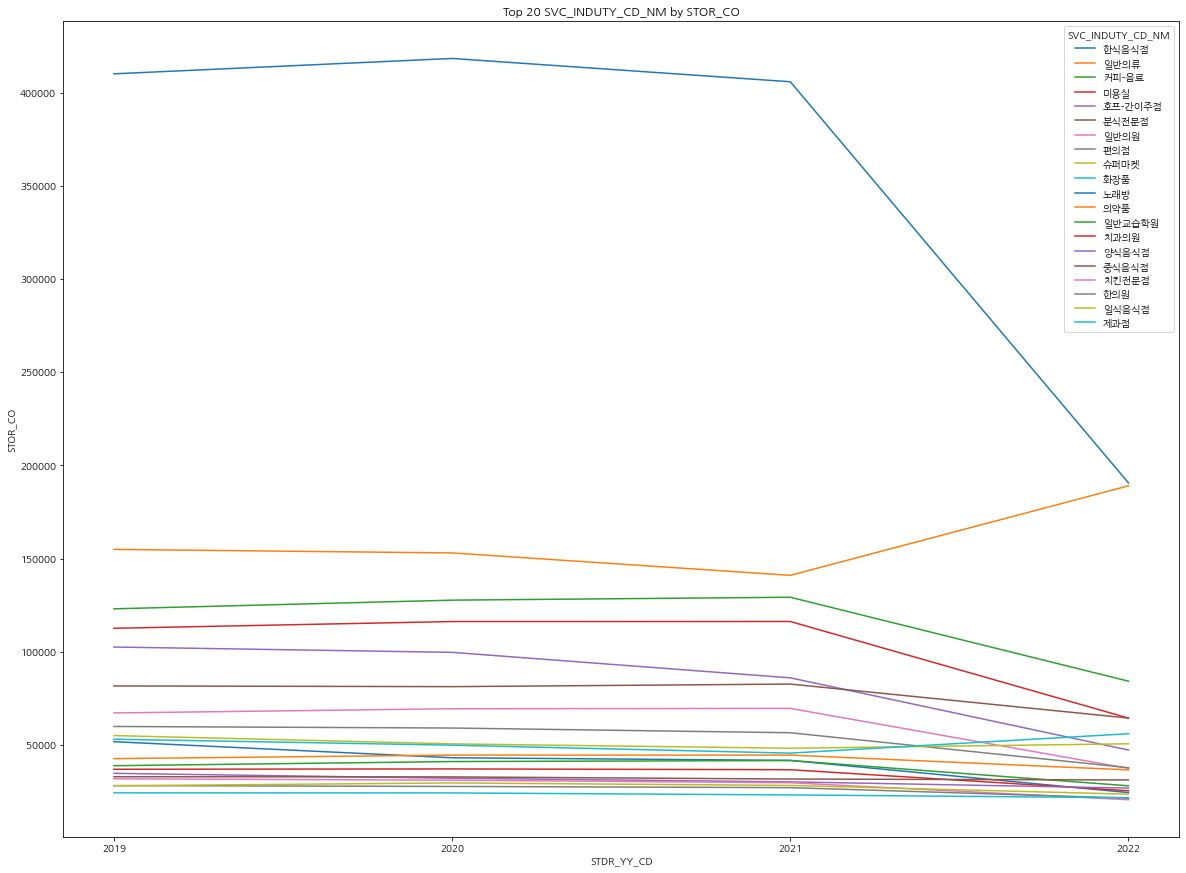

In [106]:
# 상위 20개의 서비스만 그래프로 표현
crosstab_result = pd.crosstab(data['SVC_INDUTY_CD_NM'], data['STDR_YY_CD'], data['STOR_CO'], aggfunc=sum).sort_values(by=2019, ascending=False).head(20)

crosstab_result_transposed = crosstab_result.transpose()

crosstab_result_transposed.plot(kind='line', figsize=(20, 15))
plt.xlabel('STDR_YY_CD')
plt.ylabel('STOR_CO')
plt.title('Top 20 SVC_INDUTY_CD_NM by STOR_CO')
plt.xticks([2019, 2020, 2021, 2022])
plt.legend(title='SVC_INDUTY_CD_NM')
plt.show()

#### 한식음식점의 2022년 점포수 데이터가 갑작스럽게 감소했는데 과연 이것이 신뢰할만한 데이터인지 의문이 든다.

### 2019년 상권구분코드 별 서비스 업종 점포수 상위 20개

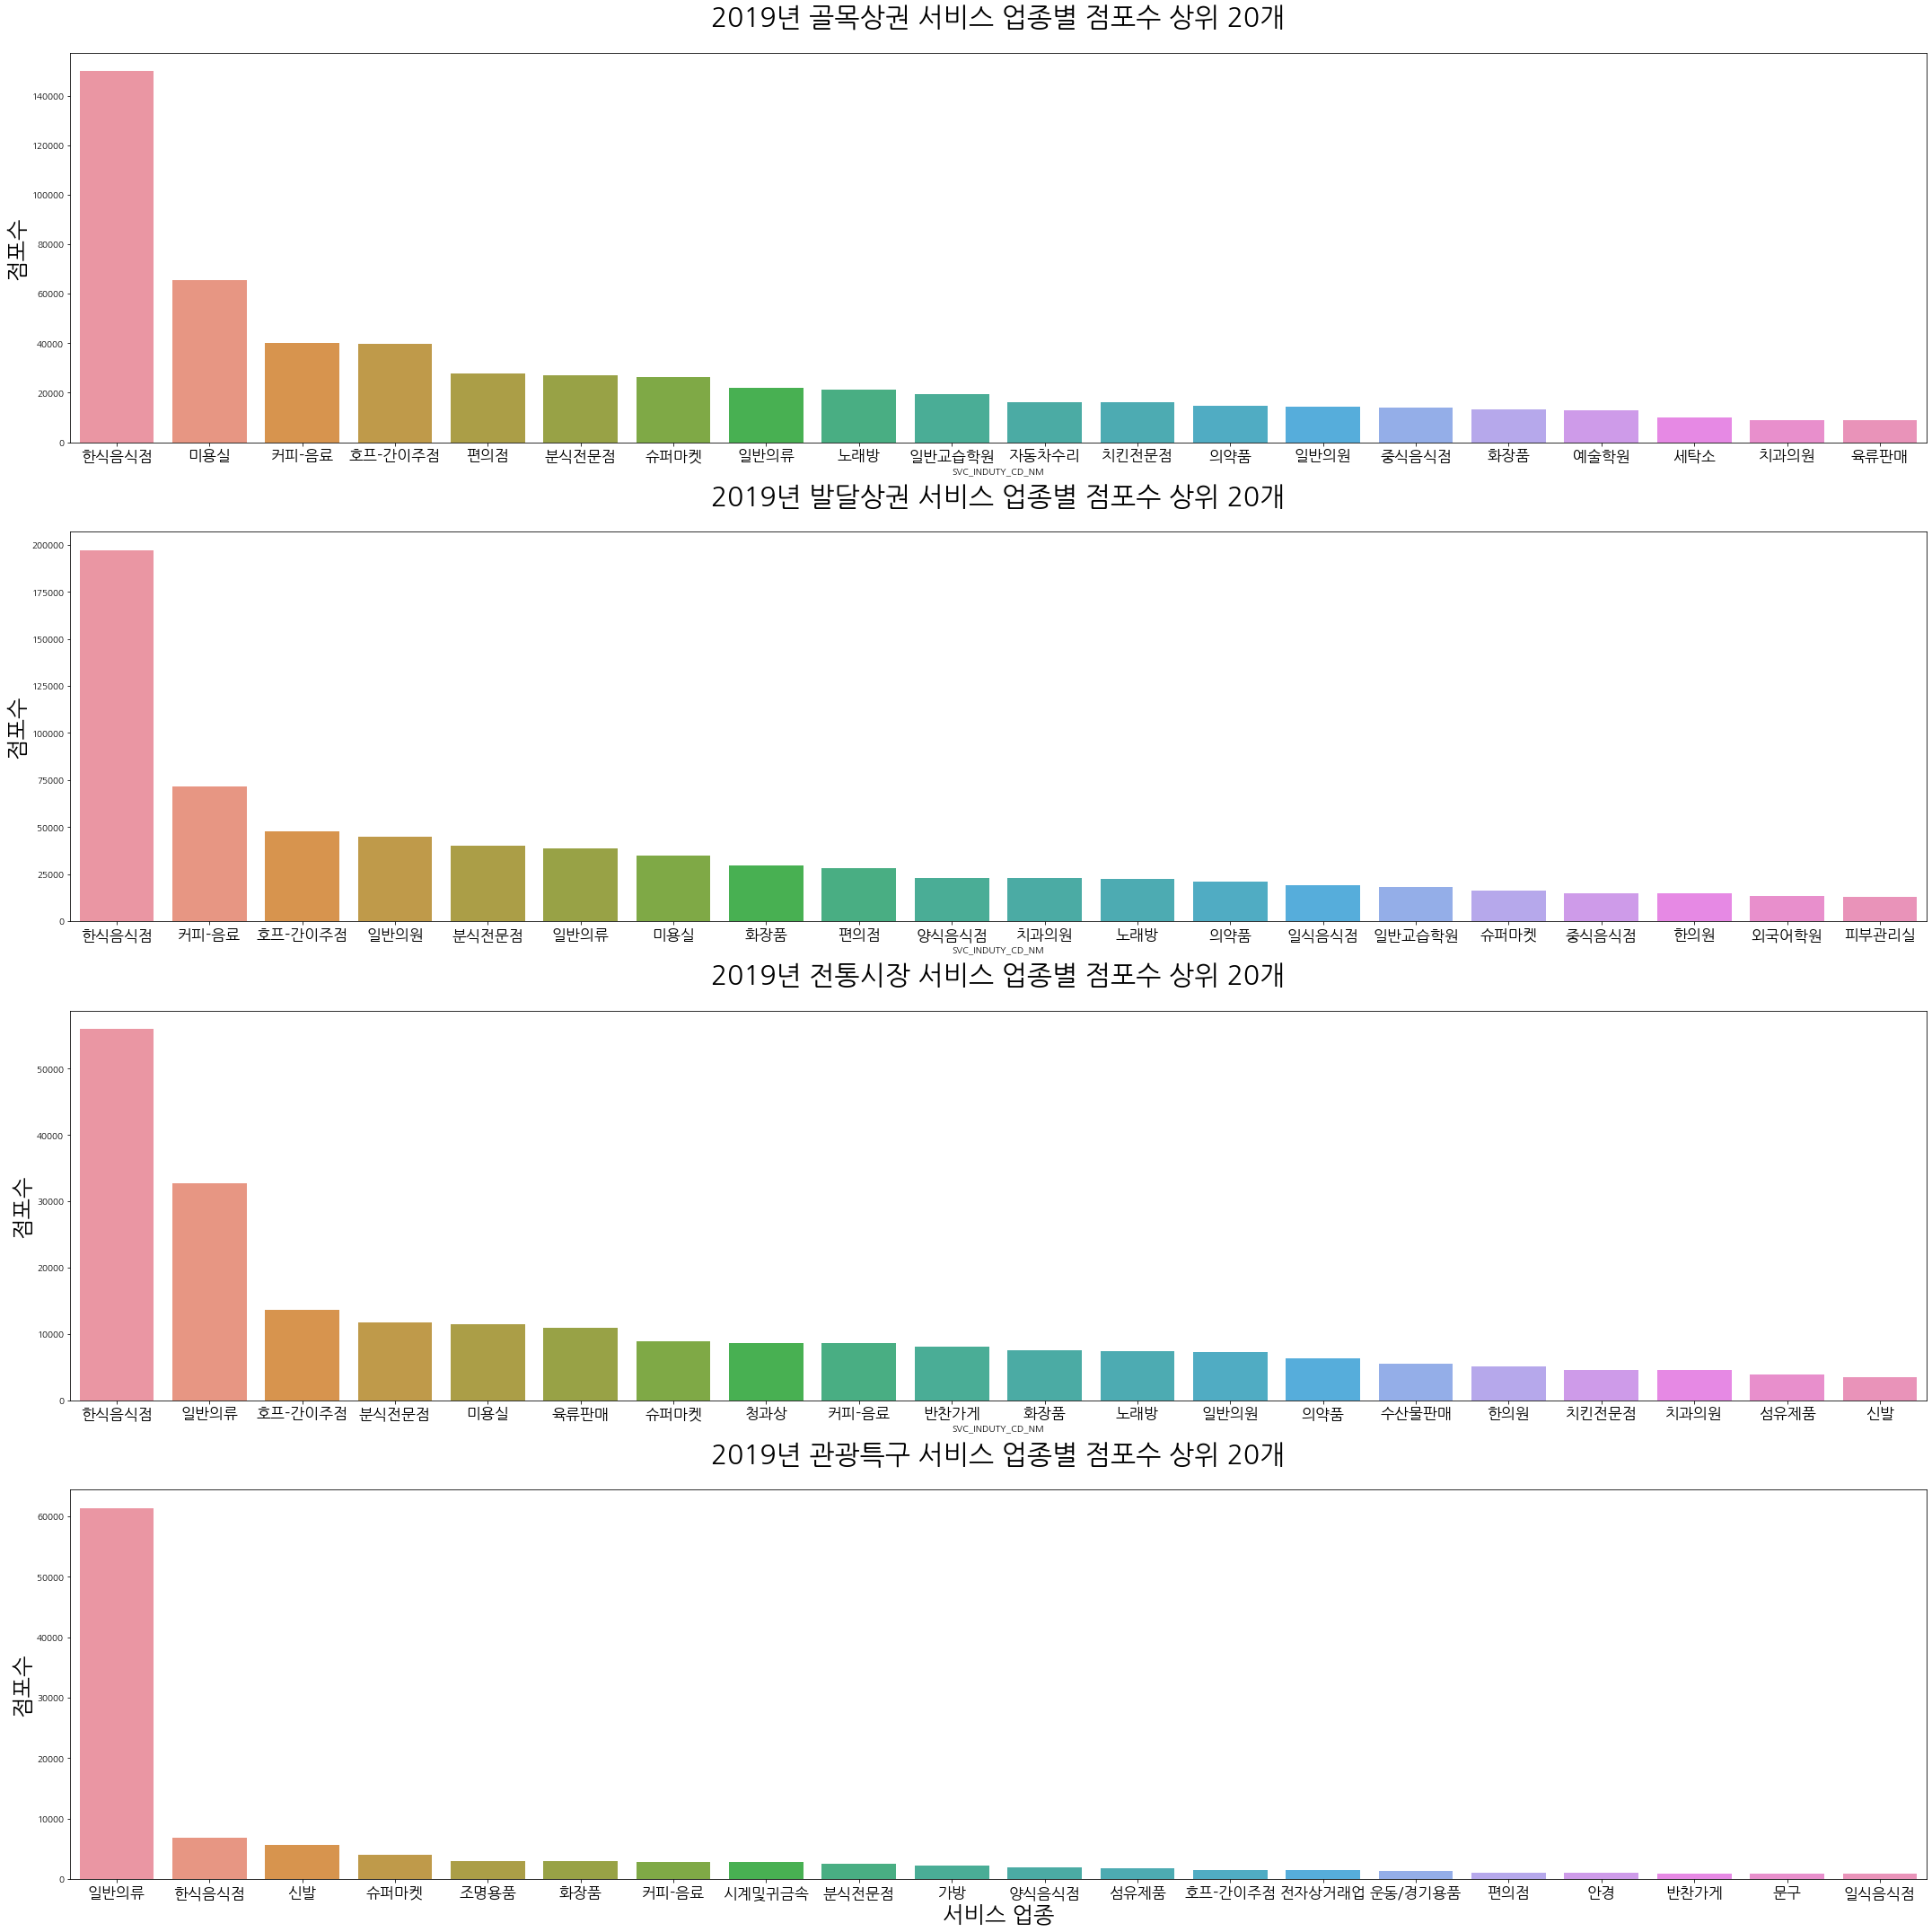

In [85]:
se_list = data['TRDAR_SE_CD_NM'].unique().tolist()

plt.figure(figsize=(30, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data_2019[data_2019['TRDAR_SE_CD_NM']== se_list[i]].groupby(['SVC_INDUTY_CD_NM'])['STOR_CO'].sum().to_frame().sort_values(by='STOR_CO', ascending =False).head(20)
    sns.barplot(x=df.index, y='STOR_CO', data=df)
    plt.title("2019년 {} 서비스 업종별 점포수 상위 20개".format(se_list[i]), fontsize = 30, pad=30)
    plt.ylabel("점포수", fontsize = 25)
    plt.xticks(fontsize = 17)
plt.xlabel("서비스 업종",fontsize = 25)
plt.tight_layout()
plt.show()

### 2022년 상권구분코드 별 서비스 업종 점포수 상위 20개

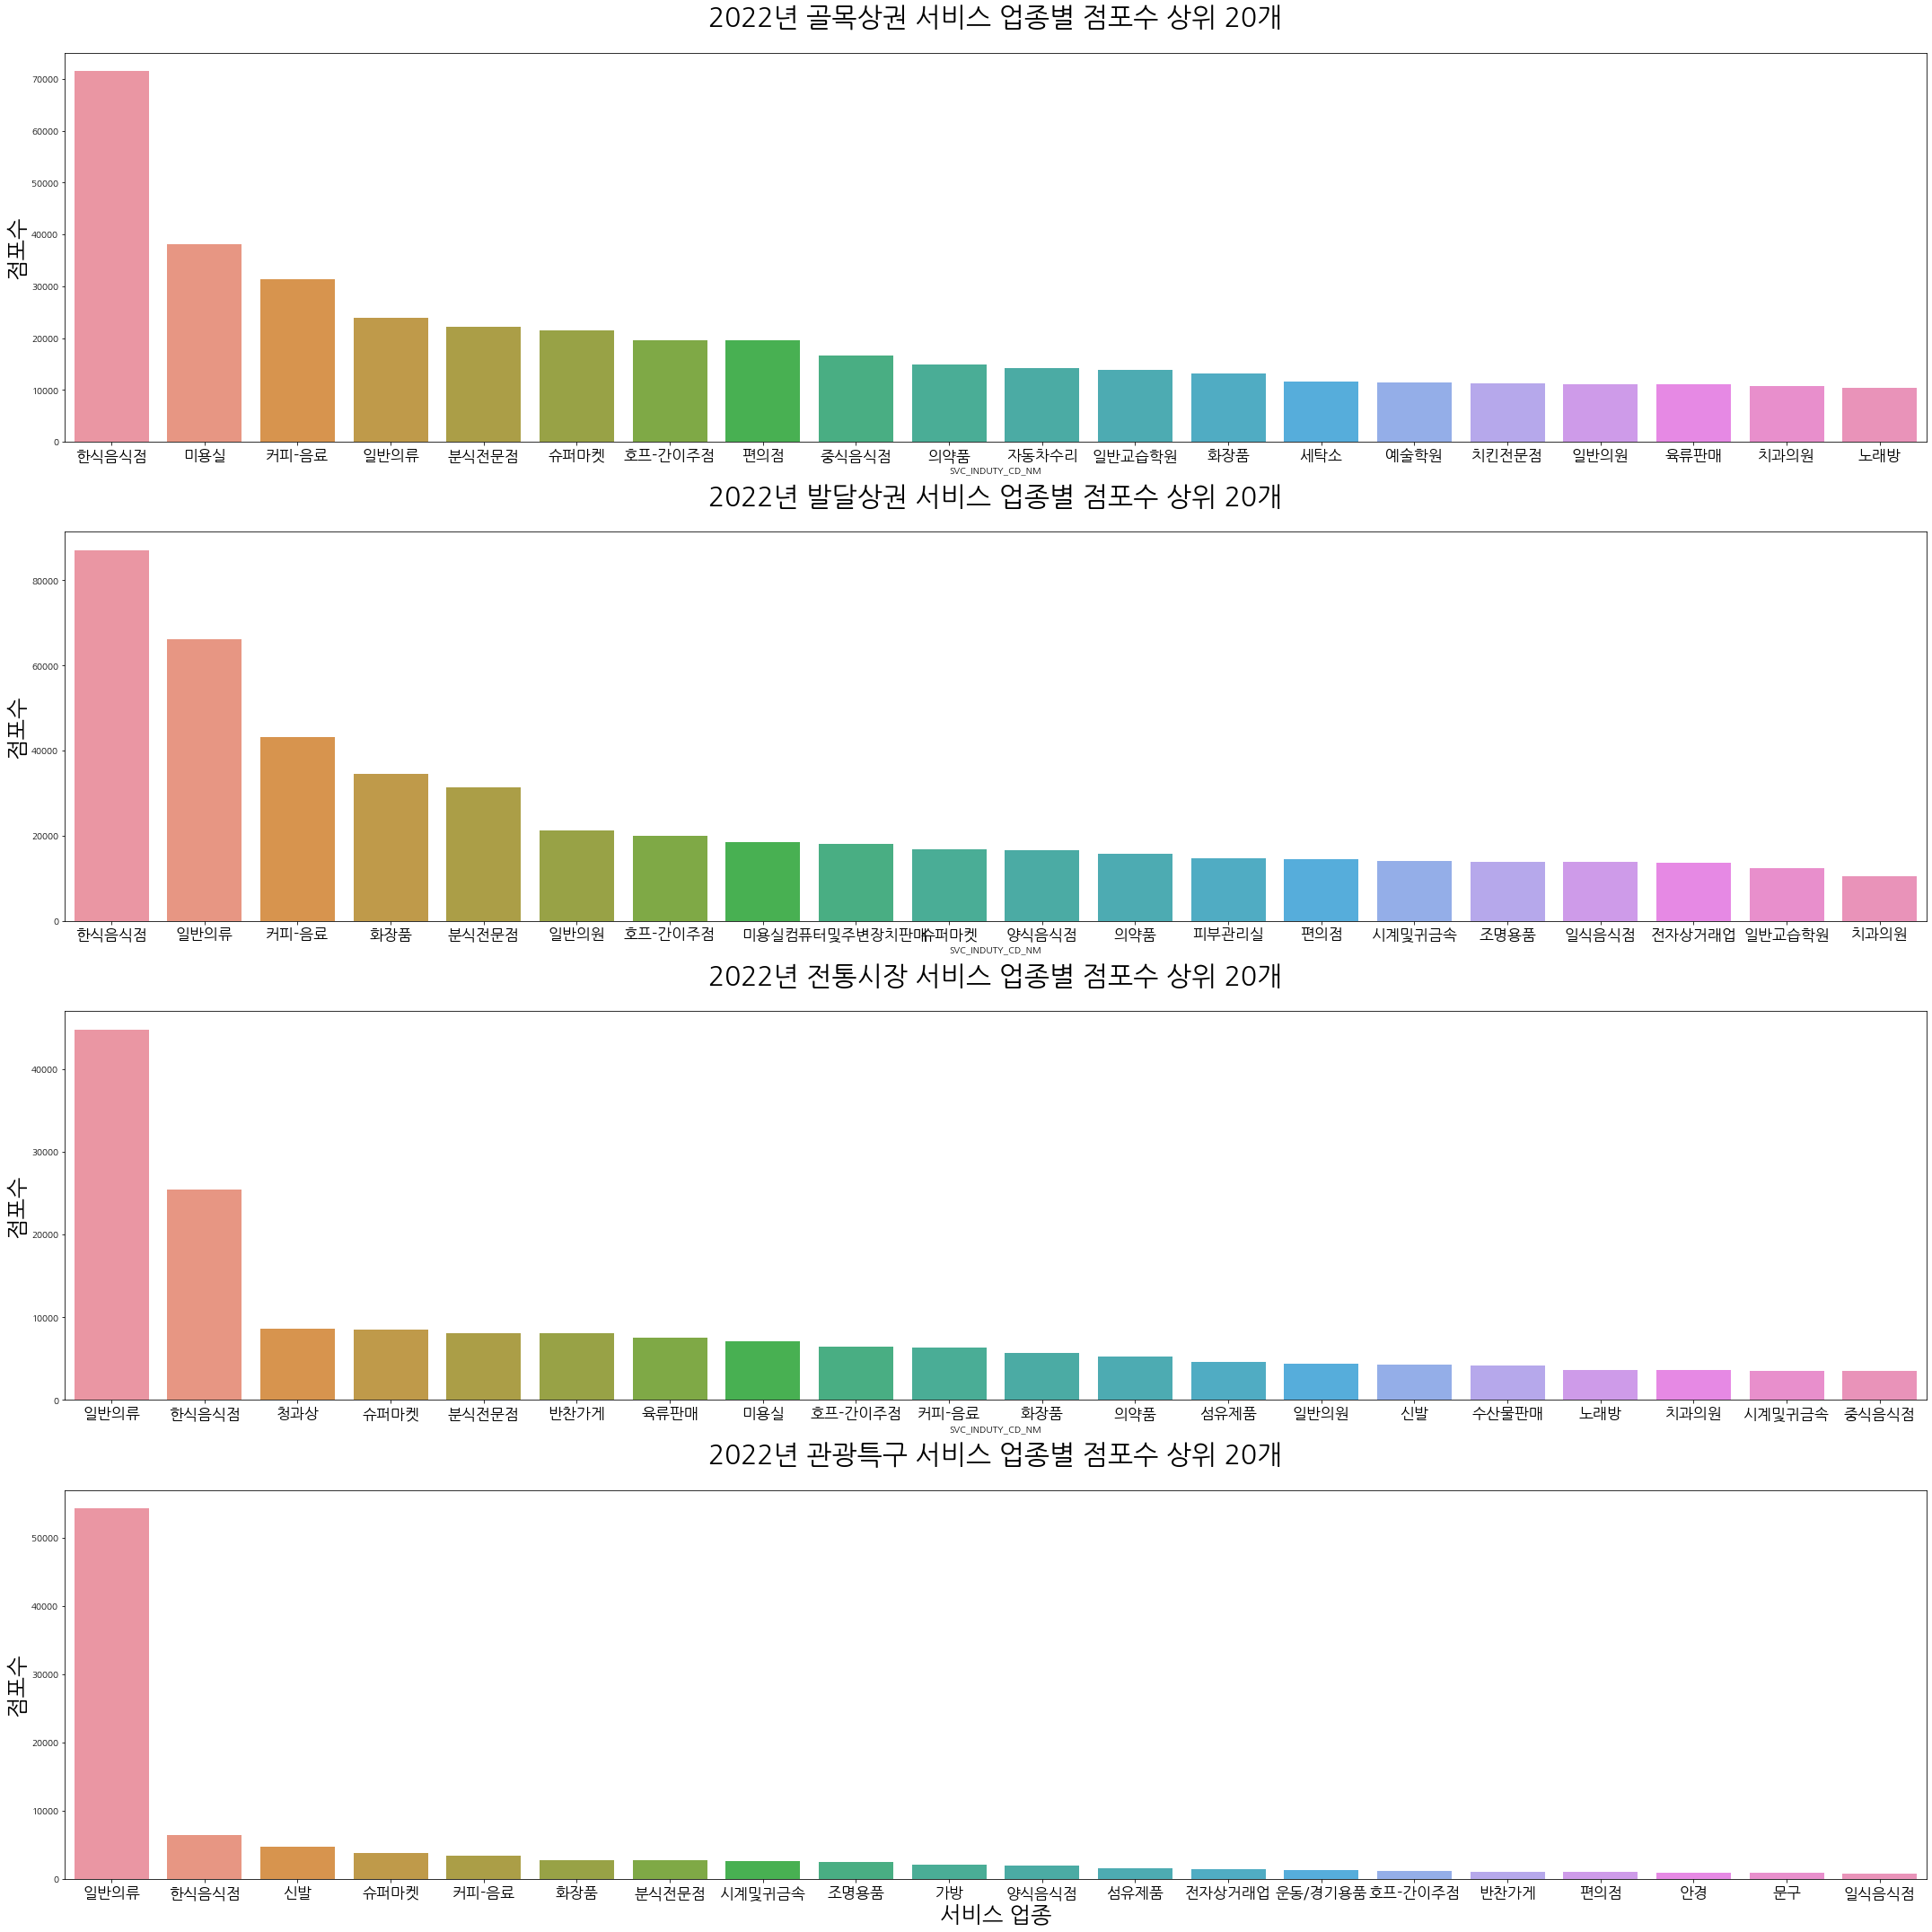

In [87]:
se_list = data['TRDAR_SE_CD_NM'].unique().tolist()

plt.figure(figsize=(30, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data_2022[data_2022['TRDAR_SE_CD_NM']== se_list[i]].groupby(['SVC_INDUTY_CD_NM'])['STOR_CO'].sum().to_frame().sort_values(by='STOR_CO', ascending =False).head(20)
    sns.barplot(x=df.index, y='STOR_CO', data=df)
    plt.title("2022년 {} 서비스 업종별 점포수 상위 20개".format(se_list[i]), fontsize = 30, pad=30)
    plt.ylabel("점포수", fontsize = 25)
    plt.xticks(fontsize = 17)
plt.xlabel("서비스 업종",fontsize = 25)
plt.tight_layout()
plt.show()

#### 코로나 이전인 2019년과 코로나 이후인 2022년의 서비스 업종별 점포수에 큰 차이가 있다.
- 하지만 2022년 데이터는 일부 데이터에서 점포수가 표시되지않아서 이를 회귀분석으로 대체한 데이터이다.

### 2022년 상권구분별 서비스 업종별 평균 매출

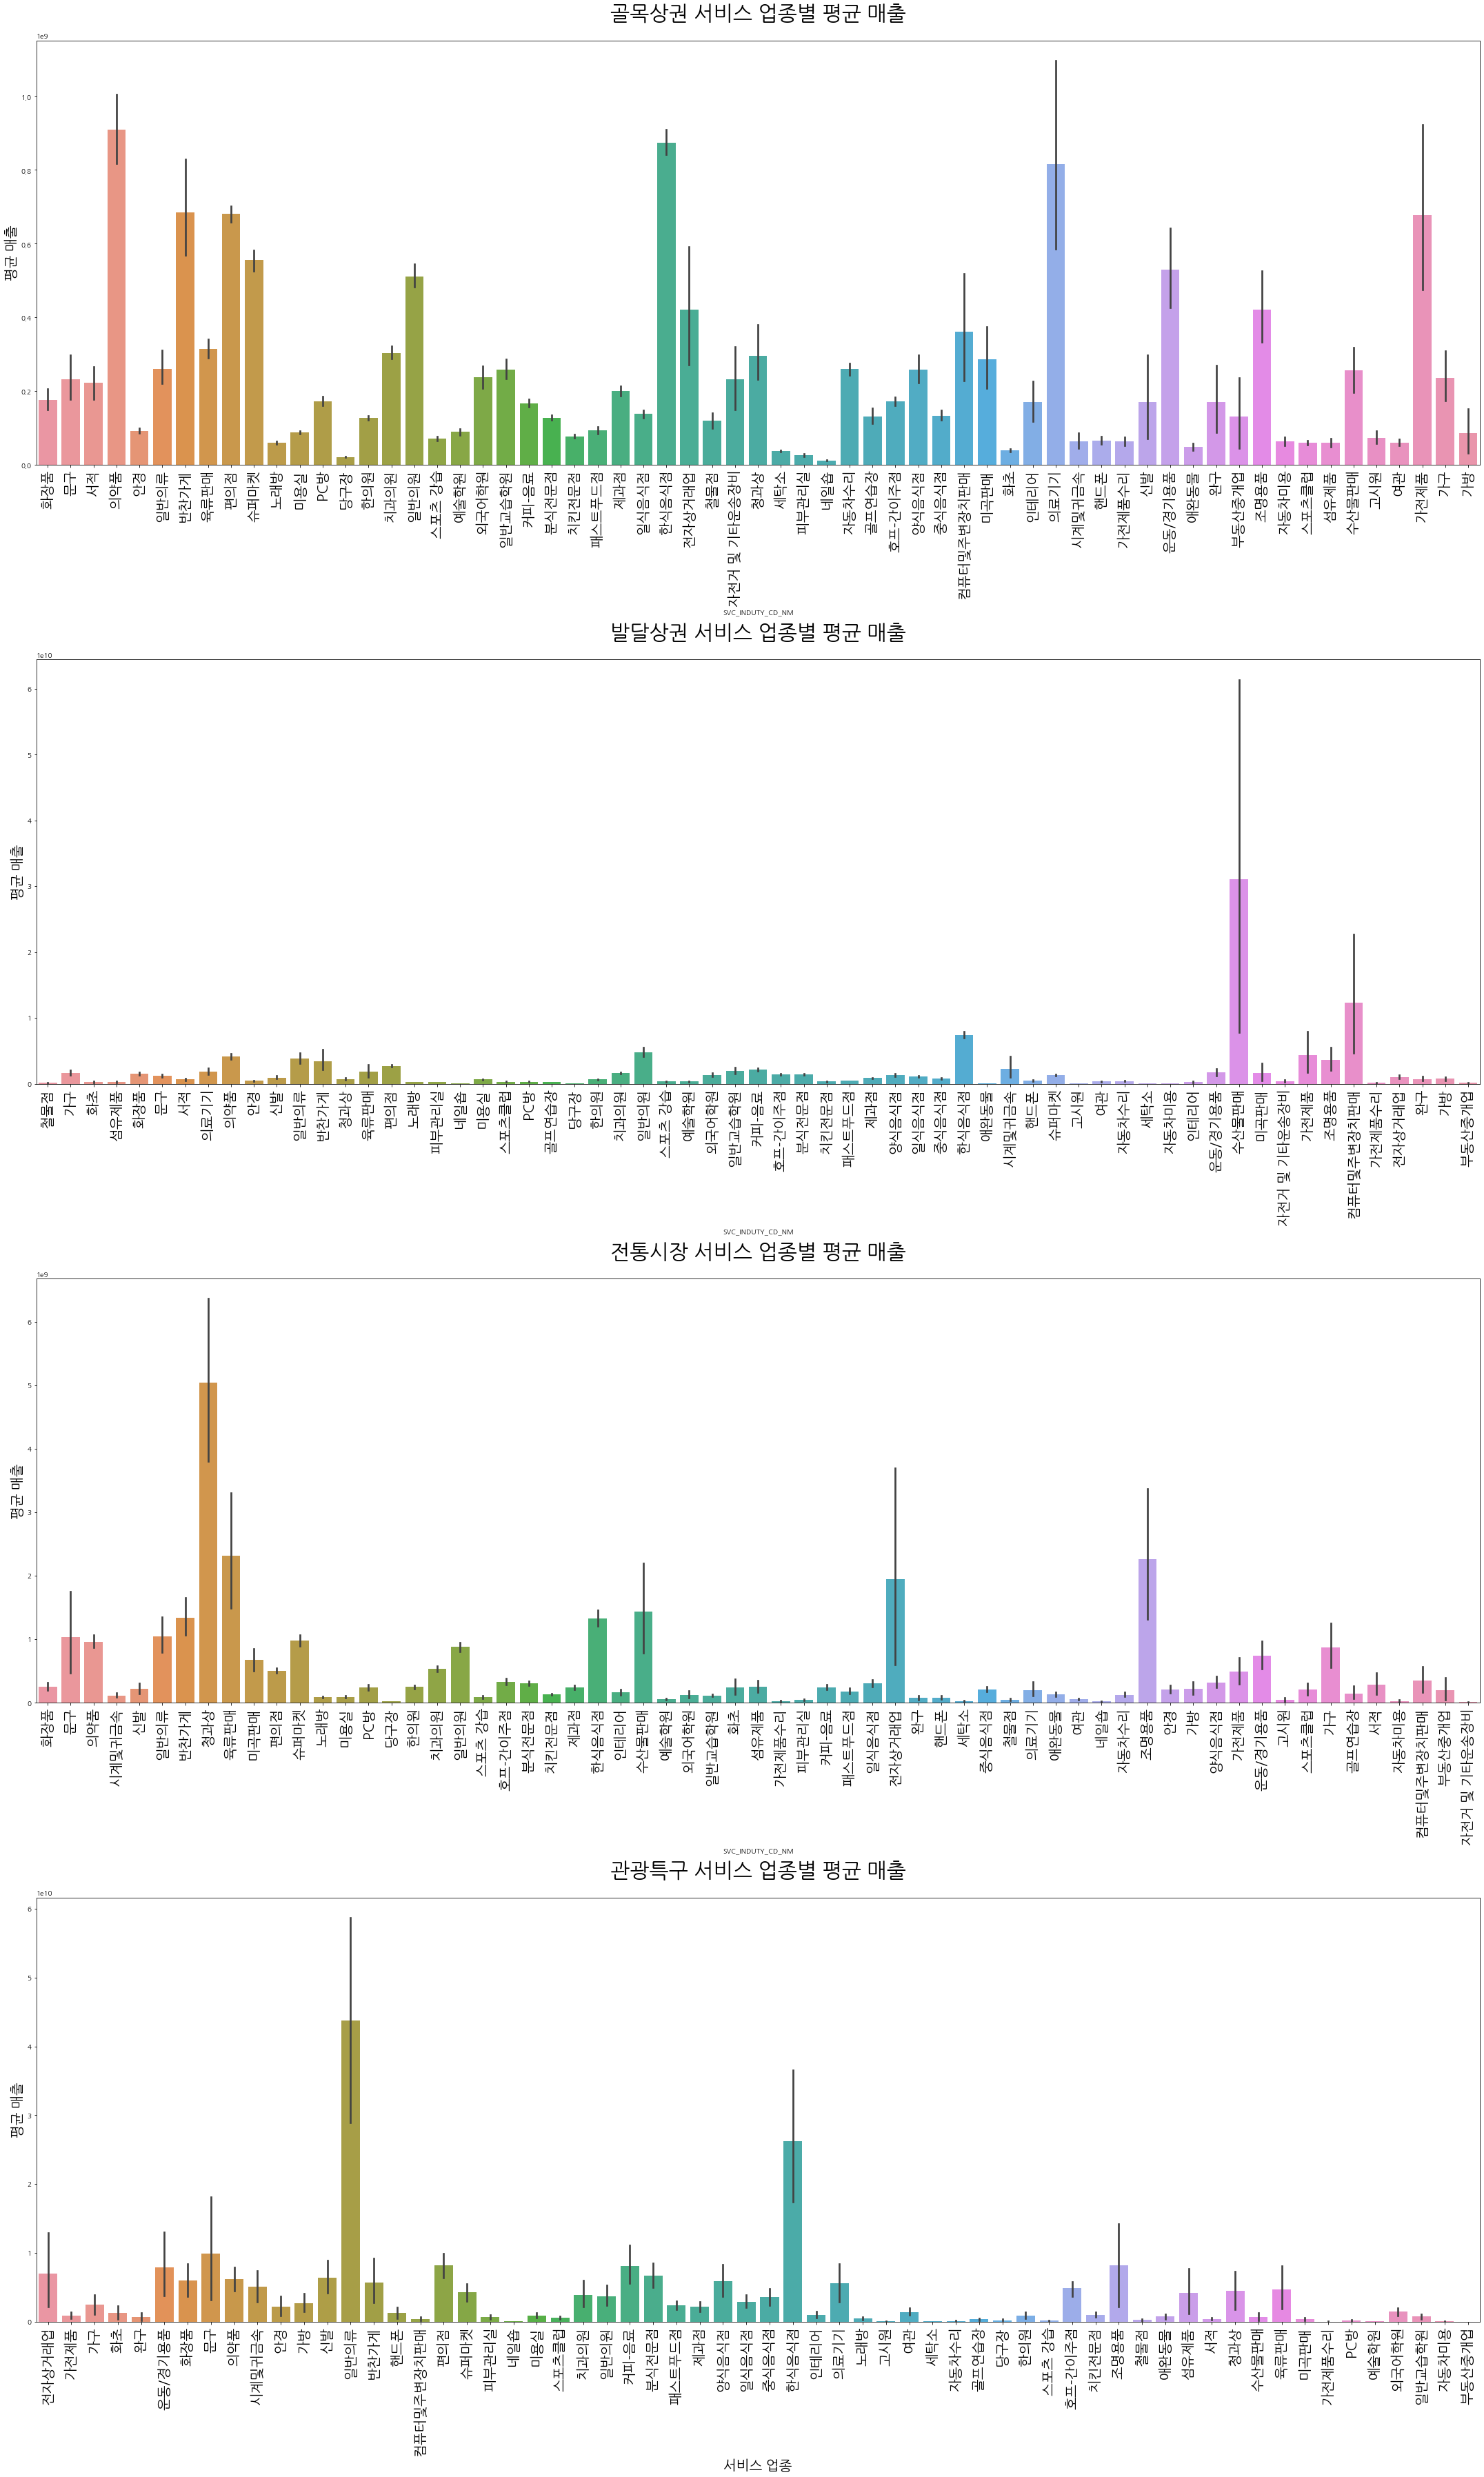

In [107]:
plt.figure(figsize=(30, 50))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data_2022[data_2022['TRDAR_SE_CD_NM'] == se_list[i]]
    sns.barplot(x='SVC_INDUTY_CD_NM', y='THSMON_SELNG_AMT', data=df)
    plt.title("{} 서비스 업종별 평균 매출".format(se_list[i]), fontsize=30, pad=30)
    plt.ylabel('평균 매출', fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
plt.xlabel('서비스 업종', fontsize = 20)
plt.tight_layout()
plt.show()

골목상권에서 가장 높은 평균 매출을 기록하는 서비스는 '의약품'이다.  
두번째는 '한식음식점'이다.  
세번째는 '의료기기'이다.  

발달상권에서 가장 높은 평균 매출을 기록한 서비스는 '수산물판매'이다.  
두번째는 '컴퓨터 및 주변장치'이다.

전통시장에서 가장 높은 평균 매출을 기록한 서비스는 '청과상'이다.  

관광특구에서 가장 높은 평균 매출을 기록한 서비스는 '일반의류'이다.  
두번째는 '한식음식점'이다. 

### 2022년 서비스 업종별 건당 평균 매출

<ipython-input-110-8648586325e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['THSMON_AMT_PER_CO_AVG'] = data_2022['THSMON_SELNG_AMT']/data_2022['THSMON_SELNG_CO']


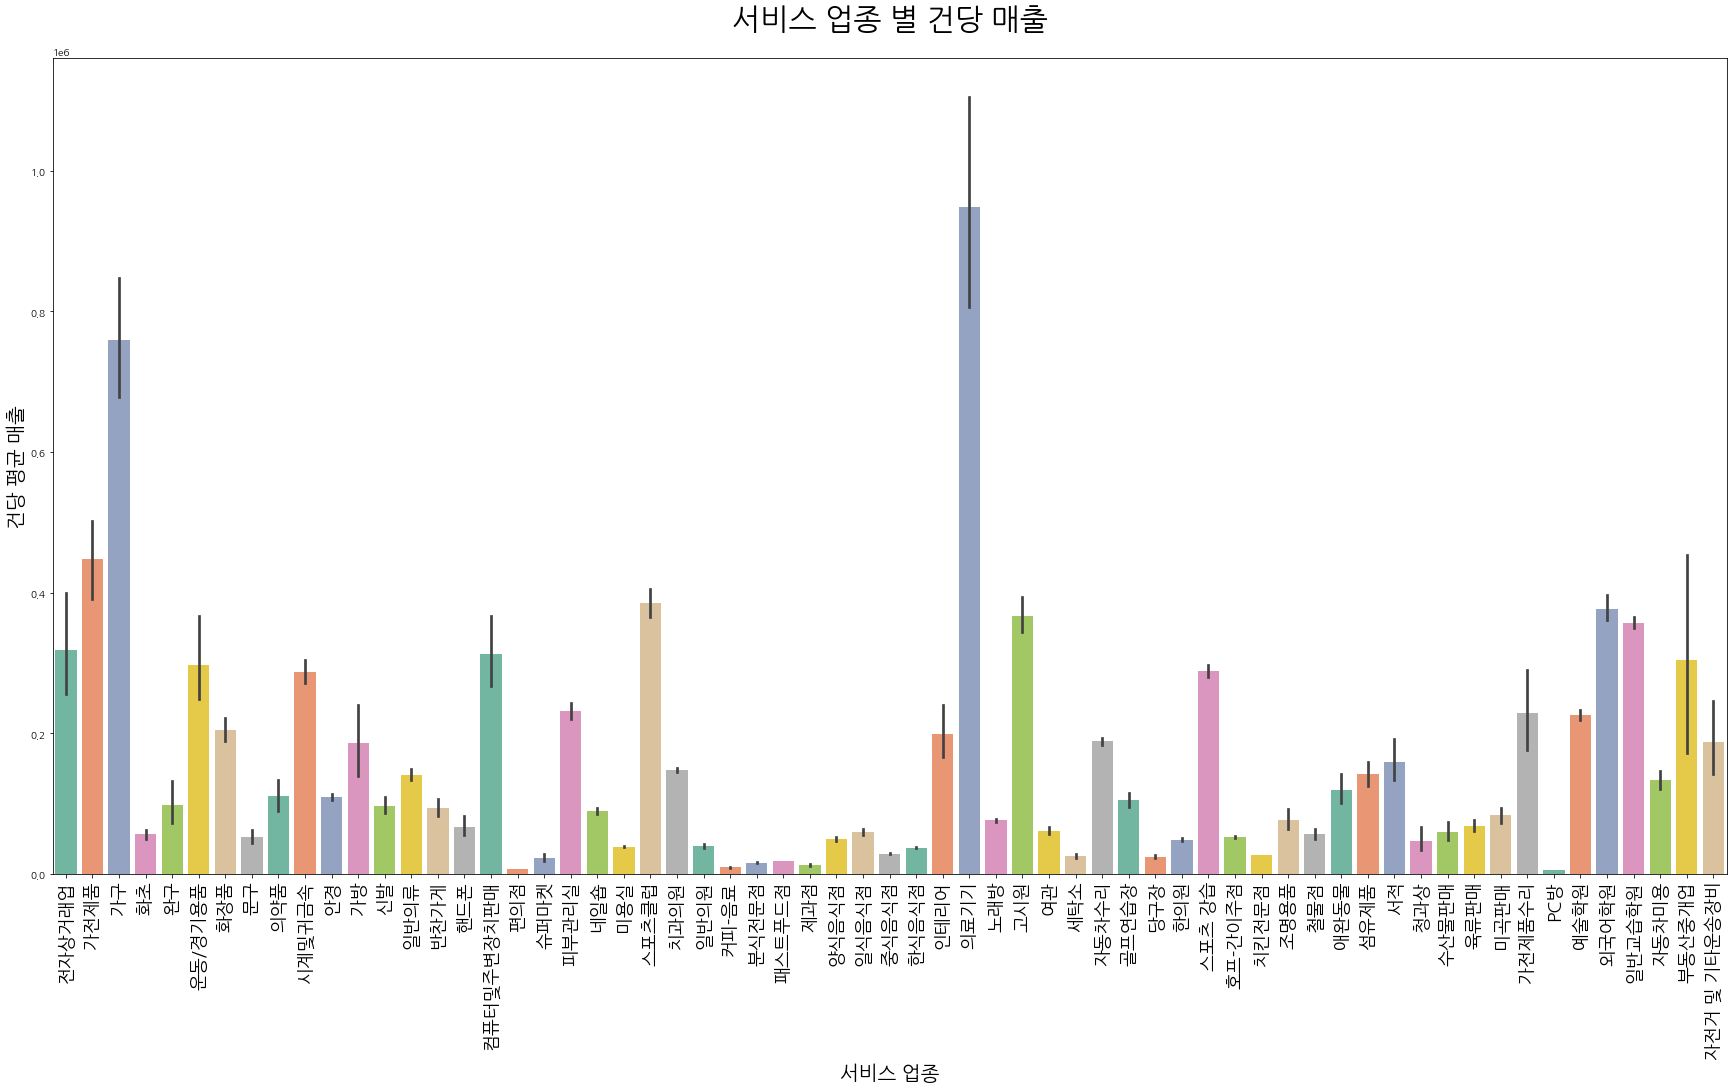

In [110]:
# 건당 평균 매출 컬럼 생성
data_2022['THSMON_AMT_PER_CO_AVG'] = data_2022['THSMON_SELNG_AMT']/data_2022['THSMON_SELNG_CO']

# 서비스 업종별 건당 평균 매출

fig = plt.figure(figsize=(30, 15))
sns.barplot(x='SVC_INDUTY_CD_NM', y ='THSMON_AMT_PER_CO_AVG', data = data_2022, palette='Set2')
plt.title("서비스 업종 별 건당 매출", fontsize = 30, pad=30)
plt.xticks(rotation=90, fontsize = 18)
plt.xlabel("서비스 업종", fontsize = 20)
plt.ylabel("건당 평균 매출", fontsize = 20)
plt.show()

서비스 업종별로 건당 평균 매출이 가장 높은 서비스는 '의료기기'이다.  
두번째는 '가구'이다.  

### 2022년 서비스별 성별 비율

In [112]:
data_2022.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE','FML_SELNG_RATE']].sort_values(by = 'ML_SELNG_RATE', ascending =False)

,ML_SELNG_RATE,FML_SELNG_RATE
SVC_INDUTY_CD_NM,,
당구장,88.388889,11.702963
PC방,81.942039,18.144570
노래방,81.236895,18.867660
여관,77.604167,22.489268
골프연습장,75.421093,24.679754
...,...,...
섬유제품,34.693012,65.386855
화장품,32.172877,67.912387
일반의류,27.977816,72.106777


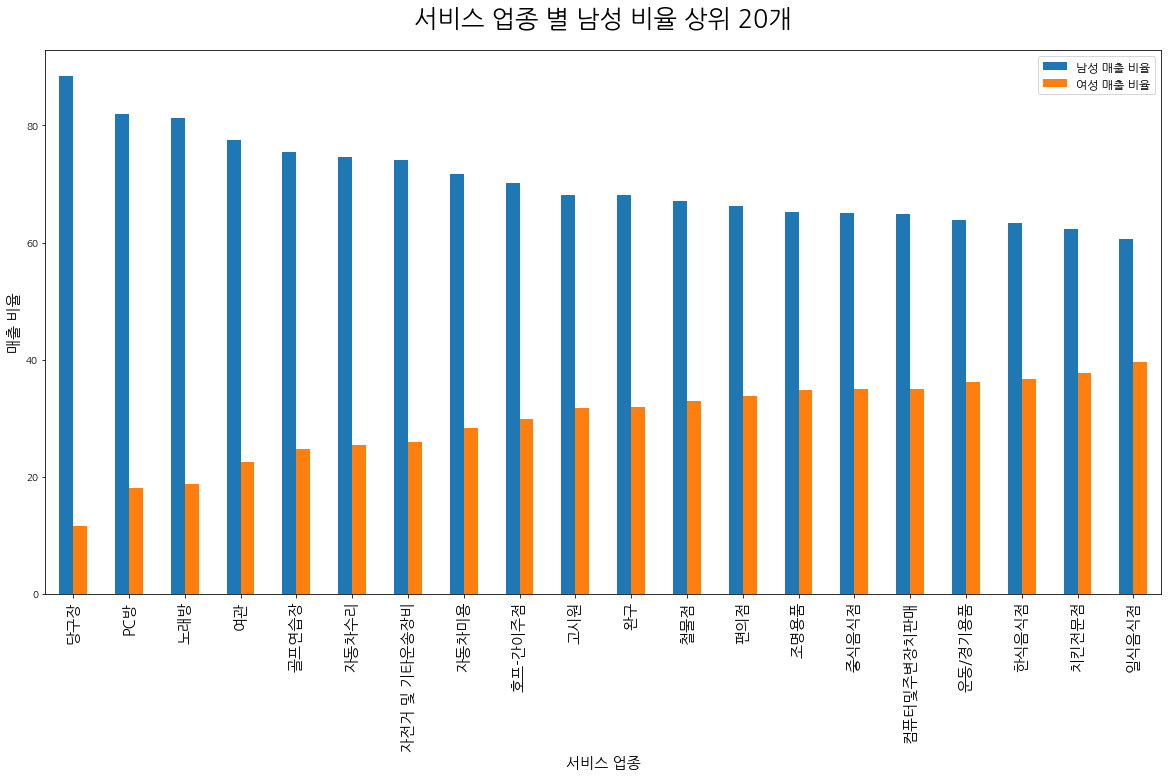

In [113]:
top_20_industries = data_2022.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='ML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 남성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

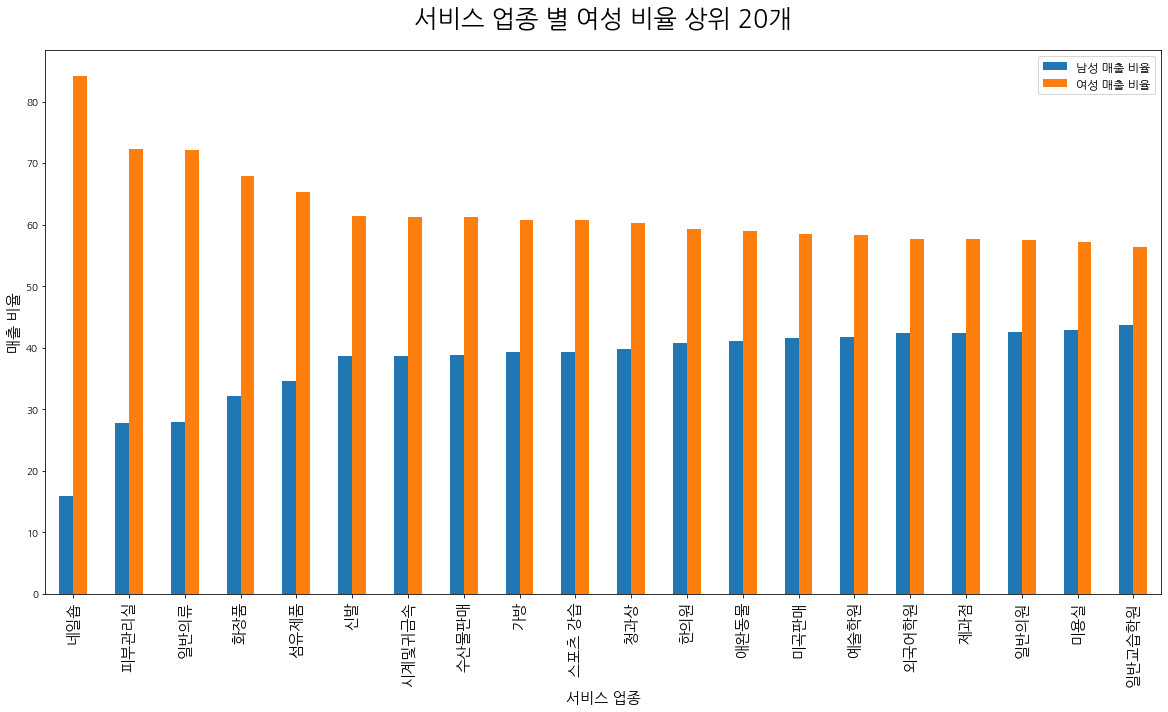

In [114]:
top_20_industries = data_2022.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='FML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 여성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

### 2022년 서비스 업종별 연령대 비율 

In [115]:
data_2022.groupby(['SVC_INDUTY_CD_NM']).mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE','AGRDE_30_SELNG_RATE','AGRDE_40_SELNG_RATE','AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']].head(20)

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_CD_NM,,,,,,
PC방,7.387742,51.264490,25.319787,8.319787,6.527648,1.469021
가구,0.035380,4.217482,13.190427,17.107180,28.907388,36.598335
가방,0.646186,9.908898,13.578390,15.252119,25.514831,35.311441
가전제품,0.140234,5.901503,13.512521,16.994992,26.726210,36.908180
가전제품수리,0.157895,5.170599,15.248639,20.725953,25.194192,33.651543
고시원,0.420245,16.478528,20.411043,21.309816,26.656442,14.763804
골프연습장,0.060816,5.382602,20.339492,29.826020,31.210162,13.423403
네일숍,0.551300,13.714090,23.866621,26.549248,22.305746,13.205198
노래방,1.022343,11.484388,15.835004,22.589516,31.902320,17.378975


In [116]:
# 상권업종대분류 컬럼 생성
data_2022['SVC_INDUTY_BIGCD_NM'] = data_2022['SVC_INDUTY_CD_NM'].apply(lambda x: '소매' if x in ['애완동물','자전거 및 기타운송장비','조명용품','완구','육류판매','가전제품', '서적', '철물점','화장품','제과점', 
                                                                                 '전자상거래업', '청과상', '핸드폰', '컴퓨터및주변장치판매', '반찬가게','가방', '가구', '슈퍼마켓', '화초', '인테리어', 
                                                                                 '수산물판매','미곡판매', '일반의류', '문구', '편의점', '의료기기', '신발', '안경','시계및귀금속']
                                             else '음식점' if x in ['일식음식점', '패스트푸드점', '한식음식점', '중식음식점', '분식전문점', '커피-음료', '양식음식점', '치킨전문점']
                                             else '여가/오락' if x in ['당구장', '네일숍','피부관리실' ,'PC방','노래방', '여관','자동차미용'] 
                                             else '스포츠'if x in['스포츠클럽','운동/경기용품', '스포츠 강습' ,'골프연습장']
                                             else '의원' if x in ['일반의원', '치과의원' , '한의원']
                                             else '생활서비스'if x in['부동산중개업', '미용실','세탁소','자동차수리']
                                             else '학원/교육')

# 결과 출력
data_2022['SVC_INDUTY_BIGCD_NM'].unique()

<ipython-input-116-9ec13e704969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['SVC_INDUTY_BIGCD_NM'] = data_2022['SVC_INDUTY_CD_NM'].apply(lambda x: '소매' if x in ['애완동물','자전거 및 기타운송장비','조명용품','완구','육류판매','가전제품', '서적', '철물점','화장품','제과점',


array(['소매', '스포츠', '학원/교육', '여가/오락', '생활서비스', '의원', '음식점'], dtype=object)

In [117]:
svc_age_rate = data_2022.groupby('SVC_INDUTY_BIGCD_NM').mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE', 'AGRDE_30_SELNG_RATE', 'AGRDE_40_SELNG_RATE', 'AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']]
svc_age_rate

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_BIGCD_NM,,,,,,
생활서비스,0.422305,10.196635,19.012572,23.031476,26.688857,20.882688
소매,0.655608,10.246503,16.399013,20.324306,25.100508,27.475378
스포츠,0.366346,13.326460,23.575256,31.690548,20.778146,10.434828
여가/오락,1.731479,17.141430,19.232602,20.640597,25.723514,15.749149
음식점,1.065577,17.818563,22.963999,22.709582,21.985614,13.709686
의원,0.156611,6.675011,13.825845,20.671267,25.866389,33.005135
학원/교육,0.333449,8.244606,14.981607,36.058939,22.914107,17.635838


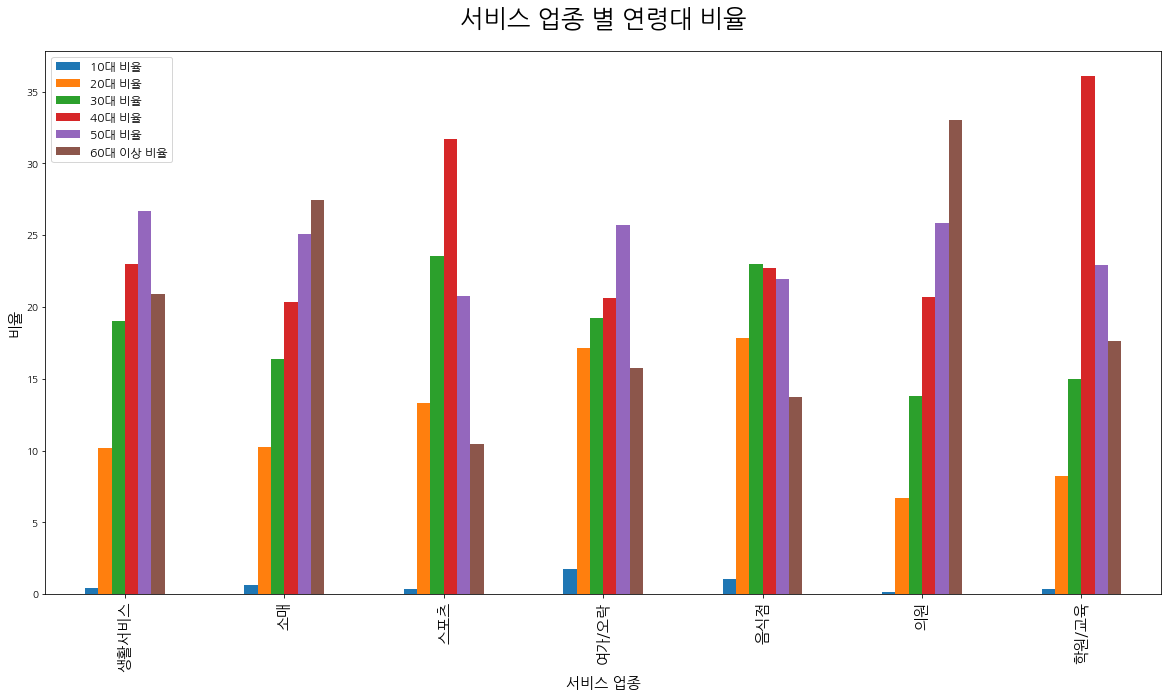

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))
svc_age_rate.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 연령대 비율', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("비율", fontsize=15)
ax.legend(["10대 비율", "20대 비율","30대 비율","40대 비율","50대 비율","60대 이상 비율"], fontsize=12)
ax.set_xticklabels(svc_age_rate.index,fontsize=15)
plt.show()

### 2022년 서비스 업종별 상관관계

In [119]:
# 서비스간 상관관계가 0.6이상인 경우만 출력
svc = data_2022['SVC_INDUTY_CD_NM'].unique().tolist()

for i in range(len(svc)-1):
    a = data_2022[data_2022['SVC_INDUTY_CD_NM'] == svc[i]].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
    b = data_2022[data_2022['SVC_INDUTY_CD_NM'] == svc[i+1]].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
    merged_data = a.merge(b, on='TRDAR_CD_NM', suffixes=(svc[i], svc[i+1]), how='inner')
    correlation = merged_data.corr() 
    high_corr = correlation[((correlation < -0.6)|(correlation > 0.6)) & (correlation < 1.0) ]
    print(high_corr)

                        THSMON_SELNG_AMT전자상거래업  THSMON_SELNG_AMT가전제품
THSMON_SELNG_AMT전자상거래업                     NaN                   NaN
THSMON_SELNG_AMT가전제품                       NaN                   NaN
                      THSMON_SELNG_AMT가전제품  THSMON_SELNG_AMT가구
THSMON_SELNG_AMT가전제품                   NaN                 NaN
THSMON_SELNG_AMT가구                     NaN                 NaN
                    THSMON_SELNG_AMT가구  THSMON_SELNG_AMT화초
THSMON_SELNG_AMT가구                 NaN                 NaN
THSMON_SELNG_AMT화초                 NaN                 NaN
                    THSMON_SELNG_AMT화초  THSMON_SELNG_AMT완구
THSMON_SELNG_AMT화초                 NaN                 NaN
THSMON_SELNG_AMT완구                 NaN                 NaN
                         THSMON_SELNG_AMT완구  THSMON_SELNG_AMT운동/경기용품
THSMON_SELNG_AMT완구                      NaN                 0.789302
THSMON_SELNG_AMT운동/경기용품            0.789302                      NaN
                         THSMON_SELNG_AMT운동

                       THSMON_SELNG_AMT치킨전문점  THSMON_SELNG_AMT조명용품
THSMON_SELNG_AMT치킨전문점                    NaN                   NaN
THSMON_SELNG_AMT조명용품                     NaN                   NaN
                      THSMON_SELNG_AMT조명용품  THSMON_SELNG_AMT철물점
THSMON_SELNG_AMT조명용품                   NaN                  NaN
THSMON_SELNG_AMT철물점                    NaN                  NaN
                      THSMON_SELNG_AMT철물점  THSMON_SELNG_AMT애완동물
THSMON_SELNG_AMT철물점                   NaN                   NaN
THSMON_SELNG_AMT애완동물                  NaN                   NaN
                      THSMON_SELNG_AMT애완동물  THSMON_SELNG_AMT섬유제품
THSMON_SELNG_AMT애완동물                   NaN                   NaN
THSMON_SELNG_AMT섬유제품                   NaN                   NaN
                      THSMON_SELNG_AMT섬유제품  THSMON_SELNG_AMT서적
THSMON_SELNG_AMT섬유제품                   NaN                 NaN
THSMON_SELNG_AMT서적                     NaN                 NaN
                     THSMON_SEL

서비스 업종끼리의 매출 상관관계를 보았을 때,    
완구와 운동/경기용품의 상관관계가 0.789302,   
피부관리숍과 네일숍의 상관관계가 0.617519,   
치과의원과 일반의원의 상관관계가 0.755833,   
커피-음표와 분식음식점의 상관관계가 0.82175,   
일식음식점과 중식음식점의 상관관계가 0.728626,  
한식음식점과 중식음식점의 상관관계가 0.626305,  
호프-간이주점과 치킨전문점의 상관관계가 0.622202, 
미곡판매와 육류판매의 상관관계가 0.860626,  
외국어학원과 일반교습학원의 상관관계가 0.76193,  
자동차미용과 부동산중개업의 상관관계가 0.692236,  
부동산중개업과 자전거 및 기타운송장비의 상관관계가 0.860797이다.

In [ ]:
### 상권 생활인구 데이터에서 상권_코드_명과 상권 매출 데이터에서 상권_코드_명이 일치하는 지 확인